<img src="./figuras/Udemm.png" width="500" align="center">

#    UdeMM - Ingeniería de Sistemas 2020
##  `Simulación de modelos en derivadas parciales`


<div class="header-container">
<br>
<br>
<label class="header-center"> Trabajo Práctico 2</label>
<br>
<br>
<label class="header-center"> Alumno: Arguimbau Pablo Esteban</label>
<br>
<br>
<label class="header-center"> Legajo: 19045</label>
 </div>


## 1. Grilla de cálculo (stencil)
Asocie cada uno de los siguientes stencils a su correspondiente esquema de cálculo:
<img src="./figuras/1.png" width="800" align="center">
<img src="./figuras/2.png" width="500" align="center">

In [1]:
#La (1) es un problema implicito - por que? Porque la solucion en el proximo paso de tiempo
#depende de los vecinos en ese mismo paso de tiempo. A esos vecinos todavia no los conozco.
#En un problema explicito, puedo pasar con la informacion del paso de tiempo anterior.
#El (1) es otro problema fisico, porque es una aproximacion de la derivada segunda. Por eso no corresponde con ninguna
#de las otras opciones.

In [2]:
#1- (A) es representado por la ecuacion (2)
#2- (B) es representado por la ecuacion (4)
#3- (C) es representado por la ecuacion (3)

# 2. Solución numérica
### 2.1. Estabilidad
Se considera un esquema de adelanto en tiempo y atraso en espacio para discretizar
un problema de advección lineal con un coeficiente convectivo $c$=4 y un tamaño de
paso espacial $\Delta x$=2. Determine el valor máximo del paso de tiempo $\Delta t$ que permita
asegurar la estabilidad de la solución. <br>


$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$


$$
\begin{equation}
\frac{\partial u}{\partial t}= c \frac{\partial u}{\partial x}
\end{equation}
$$

$$
\begin{equation}
{\partial t}= σ \frac{\partial x}{c}
\end{equation}
$$

In [3]:
from sympy import Symbol
sigma = Symbol('sigma')
dx = Symbol('dx')
dt = Symbol('dt')
a = Symbol('dt')
c = Symbol('c')

dt = sigma * dx / c
dt

dx*sigma/c

In [4]:
#Asignacion de valores
from sympy.solvers import solve
sigma = 1.0
dx = 2
c = 4
#Solve
print("dt=",solve(-dt + sigma * dx / c,dt))

dt= [0.500000000000000]


In [5]:
#Solve con Eq
from sympy import Eq
ecuation=Eq(sigma, c*dt/dx)
print("dt=",solve(ecuation,dt))

dt= [0.500000000000000]


In [6]:
#Usar SIGMA para resolver este ejercicio.
#Usar SOLVE para "punto bonus".
#Usar SUBS para puntos bonus.

### 2.2. SymPy
Empleando **SymPy** evalúe la derivada parcial con respecto a x de la expresión siguiente
en x=2.2,
<img src="./figuras/3.png" width="400" align="center">

In [7]:
import numpy
import sympy

x = sympy.symbols('x')

ecuation=((sympy.cos(x)**2) * (sympy.sin(x)**3))/ (4 * x**5 * sympy.exp(x))
#ecuation
ecuationprime = ecuation.diff(x) #Diferenciada parcial con respecto a x
#ecuationprime
ecuationprime.subs(x,2.2)

-0.000266489126709206

# 3. Trabajo de código: Flujo de tráfico
Considere el flujo de tráfico en una autopista. Procuremos describir el comportamiento general de este sistema. Para ello, definamos la velocidad de tráfico, $V$ , en kilómetros por hora. La densidad de tráfico, esto es el número de autos por unidad de longitud de autopista, $\rho$, en autos por kilómetro. 
Finalmente, podemos definir el flujo de tráfico, esto es el $caudal$ de autos, $F$, en autos por hora. <br>
Supongamos ahora que si $\rho$ se aproxima a 0, es decir hay muy pocos autos en la autopista,
estos circularán tan velozmente como puedan a una velocidad $V_{max}$. Asimismo,
si la abundancia de autos es muy alta, entonces $\rho$ se aproxima a $\rho _{max}$ y por consiguiente
$V$ se aproxima a 0. Una ecuación posible que describa este comportamiento
se escribe:<br>
<img src="./figuras/4.png" width="400" align="center">
siendo
<img src="./figuras/5.png" width="400" align="center">
El flujo de tráfico en estado no estacionario puede modelarse como un problema de
advección no lineal de la densidad de autos, siendo el coeficiente convectivo $V$ igual
a $\partial F/\partial \rho$:
<img src="./figuras/6.png" width="400"  align="center">
Aplicando la regla de la cadena, resulta
<img src="./figuras/7.png" width="400"  align="center">
Discretize la ecuación de flujo de tráfico empleando un esquema en diferencias de
adelanto en tiempo y atraso en espacio. Considere un trayecto de autopista de 11km de longitud sujeto a las siguientes condiciones:
<img src="./figuras/8.png" width="200" align="center">


### 3.1. Resultados de Simulación: Parte A
Empleando la siguiente condición inicial para la densidad de tráfico:
<img src="./figuras/9.png" width="600"  align="center">
y la siguiente condición de borde:
$$
\begin{equation}
\rho(0,t)=10
\end{equation}
$$
Determine:
1. Velocidad mínima en el instante $t$ = 0;
2. Velocidad media en el instante $t$ = 3 minutos;
3. Velocidad mínima en el instante $t$ = 6 minutos.

<img src="./figuras/8.png" width="200" align="center">

In [8]:
#Datos Iniciales
#Vmax = 80km/h
#L = 11km
#rhomax = 250autos/km
#nx = 51
#dt= 0.001h

#u en este caso es la velocidad del trafico (no del coche), la velocidad del flujo de coches en una seccion determinada
#de la autopista.
#rho = densidad de autos

$$
\begin{equation}
v = v_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

$$
\begin{equation}
v = 80 km/h \left(1-\frac{\rho}{250 autos/km}\right)
\end{equation}
$$

In [9]:
# Parametros iniciales
nx = 51  # numero de "ubicaciones" en la ruta (se usan numeros que terminan en 1 para dejar dx con un valor redondo)
L = 11.0  # longitud de la ruta
dx = L / (nx - 1)  # distancia entre ubicaciones consecutivas
nt = 50  # numero de time-steps
v_max = 80.0  # velocidad maxima de transito
rho_max = 250.0  # maxima densidad de vehiculos admitidos en la ruta

# Discretizacion de la ruta.
x = numpy.linspace(0, L, nx)

# Densidad inicial de trafico.
rho0 = numpy.ones(nx)*10 #densidad normal es 10, con densidad de 50 entre las ubicaciones #10 y #20 de la lista.
rho0[10:20] = 50

In [10]:
#Valores de densidad inicial (rho0) de trafico en cada ubicacion de la ruta (lista), definido por nx
print(rho0)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


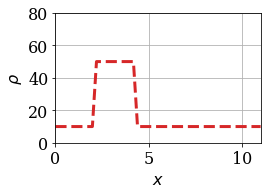

In [11]:
# Importando librerias
import numpy
from matplotlib import pyplot
%matplotlib inline

# Actualizamos la fuente para distinguir mejor los graficos
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot de densidad inicial en la ruta
fig = pyplot.figure(figsize=(4.0, 3.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C3', linestyle='--', linewidth=3)[0]
pyplot.xlim(0.0, L) #Valores superiores a L quedan vacios / sin valores de rho
pyplot.ylim(0, 80.0);
fig.tight_layout()

In [12]:
#Definimos flujo, relacion rho, vmax, rho_max
def flujo(rho, v_max, rho_max):
    F = rho * v_max * (1.0 - rho / rho_max)
    return F

$$
\begin{equation}
F = F(\rho) = V(\rho)\rho = {\rho} v_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

In [13]:
#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        
        # Computando el flujo.
        F = flujo(rho, *args)
        
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])

        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 10
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist

$$
\begin{equation}
\rho(0,t)=10
\end{equation}
$$

In [14]:
# Set the time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / v_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

In [15]:
#La funcion update_plot tiene a rho_hist como entrada
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [16]:
#Importamos animaciones
from matplotlib import animation
from IPython.display import HTML

In [17]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

In [18]:
#Veamos ahora los valores de velocidad.

$$
\begin{equation}
v = v_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

$$
\begin{equation}
v = 80 km/h \left(1-\frac{\rho}{250 autos/km}\right)
\end{equation}
$$

In [19]:
#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        
        print("################\n\nEn el tiempo",n, "la densidad rho tiene los siguientes valores:\n",rho,"\n")
        #print("El flujo F tiene los sigiuentes valores:",F)
        
        # Computando el flujo.
        F = flujo(rho, *args)
        
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        
        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 10
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist

In [20]:
# Veamos los valores de rho a lo largo de todo el camino (guardados en la lista rho_hist)
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

################

En el tiempo 0 la densidad rho tiene los siguientes valores:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.] 

################

En el tiempo 1 la densidad rho tiene los siguientes valores:
 [10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  19.6 50.  50.  50.
 50.  50.  50.  50.  50.  50.  40.4 10.  10.  10.  10.  10.  10.  10.
 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
 10.  10.  10.  10.  10.  10.  10.  10.  10. ] 

################

En el tiempo 2 la densidad rho tiene los siguientes valores:
 [10.      10.      10.      10.      10.      10.      10.      10.
 10.      10.      11.13664 28.06336 50.      50.      50.      50.
 50.      50.      50.      50.      46.52864 34.27136 10.      10.
 10.      10.      10.      10.      10.      10.      10.      10.
 10.      10.      

In [21]:
#Tambien se puede visualizar las densidades en un momento "t" utilizando rho_hist[t], por ejemplo en t=42:
print("En t=42, tenemos las siguientes densidades en cada ubicacion de la ruta:\n",rho_hist[42])

En t=42, tenemos las siguientes densidades en cada ubicacion de la ruta:
 [10.         10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.         10.00000001 10.00000014 10.00000173 10.00002041
 10.00023138 10.00253803 10.02699866 10.27534429 12.41354395 22.16615032
 36.72969552 43.82112694 44.86181938 43.90446589 42.33993289 40.51732532
 38.53368337 36.42871913 34.22736078]


In [22]:
#importamos statistics para usar la libereria mean, es mas facil que calcular el promedio de forma manual
import statistics

#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        
        # Computando el flujo.
        F = flujo(rho, *args)
        
        #Especifiquemos los tiempos (con nt=50)
        if n==0:
            print("################\n\nEn el tiempo",n)
            rhomax = max(rho) #usamos rhomax para calcular velocidad minima (mayor densidad = menor velocidad de autos)
            print("El rho maximo en tiempo",n,"equivale a",rhomax)
            v = v_max * (1-rhomax/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad minima en el tiempo ",n," equivale a ",v,"\n")

        if n==3:
            print("################\n\nEn el tiempo",n)
            rhomean = statistics.mean(rho) #usamos rhomean
            print("El rho promedio en tiempo",n,"equivale a",rhomean)
            v = v_max * (1-rhomean/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad promedia en el tiempo ",n," equivale a ",v,"\n")
        
        if n==6:
            print("################\n\nEn el tiempo",n)
            rhomax = max(rho) #usamos rhomax para calcular velocidad minima (mayor densidad = menor velocidad de autos)
            print("El rho maximo en tiempo",n," equivale a ",rhomax)
            v = v_max * (1-rhomax/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad minima en el tiempo ",n," equivale a ",v,"\n")

        if n==40:
            print("################\n\nEstaran bien estos resultados? Que pasa si, por ejemplo, probamos con n=40?")
            rhomean = statistics.mean(rho)
            print("El rho promedio en tiempo",n," equivale a ",rhomean)
            rhomin = min(rho)
            print("El rho minimo en tiempo",n," equivale a ",rhomin)
            rhomax = max(rho)
            print("El rho maximo en tiempo",n," equivale a ",rhomax)
            
            print("Sabemos que v = v_max * (1-rho/rho_max), por lo tanto:")
            v = v_max * (1-rhomax/rho_max)
            print("La velocidad minima en el tiempo ",n," equivale a ",v)
            v = v_max * (1-rhomin/rho_max)
            print("La velocidad maxima en el tiempo ",n," equivale a ",v)
            v = v_max * (1-rhomean/rho_max)
            print("La velocidad promedia en el tiempo ",n," equivale a ",v)
            
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        
        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 10
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

################

En el tiempo 0
El rho maximo en tiempo 0 equivale a 50.0
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad minima en el tiempo  0  equivale a  64.0 

################

En el tiempo 3
El rho promedio en tiempo 3 equivale a 17.84313725490196
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad promedia en el tiempo  3  equivale a  74.29019607843136 

################

En el tiempo 6
El rho maximo en tiempo 6  equivale a  50.0
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad minima en el tiempo  6  equivale a  64.0 

################

Estaran bien estos resultados? Que pasa si, por ejemplo, probamos con n=40?
El rho promedio en tiempo 40  equivale a  16.3201427537863
El rho minimo en tiempo 40  equivale a  10.0
El rho maximo en tiempo 40  equivale a  45.2219545699099
Sabemos que v = v_max * (1-rho/rho_max), por lo tanto:
La velocidad minima en el tiempo  40  equivale a  65.52897453762883
La velocidad maxima en el tiempo  40  

### 3.2. Resultados de Simulación: Parte B
Considere ahora $V_{max} = 136 km/h$ y repita la simulación empleando la siguiente
condición inicial para la densidad de tráfico:
<img src="./figuras/10.png" width="600"  align="center">
y la siguiente condición de borde:
$$
\begin{equation}
\rho(0,t)=20
\end{equation}
$$
Determine:
1. Velocidad mínima en el instante $t$ = 0;
2. Velocidad media en el instante $t$ = 3 minutos;
3. Velocidad mínima en el instante $t$ = 6 minutos.

In [23]:
# Parametros iniciales
nx = 51  # numero de "ubicaciones" en la ruta (se usan numeros que terminan en 1 para dejar dx con un valor redondo)
L = 11.0  # longitud de la ruta
dx = L / (nx - 1)  # distancia entre ubicaciones consecutivas
nt = 50  # numero de time-steps
v_max = 136.0  # velocidad maxima de transito
rho_max = 250.0  # maxima densidad de vehiculos admitidos en la ruta

# Discretizacion de la ruta.
x = numpy.linspace(0, L, nx)

# Densidad inicial de trafico.
rho0 = numpy.ones(nx)*20 #densidad normal es 10, con densidad de 50 entre las ubicaciones #10 y #20 de la lista.
rho0[10:20] = 50

In [24]:
#Valores de densidad inicial (rho) en cada ubicacion de la ruta (lista), definido por nx
print(rho0)

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


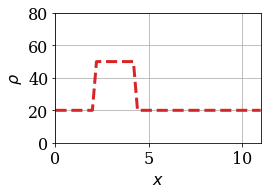

In [25]:
# Importando librerias
import numpy
from matplotlib import pyplot
%matplotlib inline

# Actualizamos la fuente para distinguir mejor los graficos
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot de densidad inicial en la ruta
fig = pyplot.figure(figsize=(4.0, 3.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C3', linestyle='--', linewidth=3)[0]
pyplot.xlim(0.0, L) #Valores superiores a L quedan vacios / sin rho
pyplot.ylim(0, 80.0);
fig.tight_layout()

In [26]:
#Definimos flujo, relacion rho, vmax, rho_max
def flujo(rho, v_max, rho_max):
    F = rho * v_max * (1.0 - rho / rho_max)
    return F

$$
\begin{equation}
F = F(\rho) = V(\rho)\rho = {\rho} v_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

In [27]:
#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        
        # Computando el flujo.
        F = flujo(rho, *args)
        
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])

        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 20
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist

$$
\begin{equation}
\rho(0,t)=20
\end{equation}
$$

In [28]:
# Set the time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / v_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

In [29]:
#La funcion update_plot tiene a rho_hist como entrada
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [30]:
#Importamos animaciones
from matplotlib import animation
from IPython.display import HTML

In [31]:
# Create an animation of the traffic density.

anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

In [32]:
#Veamos ahora los valores de velocidad.

$$
\begin{equation}
v = v_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

$$
\begin{equation}
v = 80 km/h \left(1-\frac{\rho}{250 autos/km}\right)
\end{equation}
$$

In [33]:
#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        print("################\n\nEn el tiempo",n,"la densidad rho tiene los siguientes valores:\n",rho,"\n")
        # Computando el flujo.
        F = flujo(rho, *args)
        
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        
        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 10
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist

In [34]:
# Veamos los valores de rho a lo largo de todo el camino (guardados en la lista rho_hist)
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

################

En el tiempo 0 la densidad rho tiene los siguientes valores:
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.] 

################

En el tiempo 1 la densidad rho tiene los siguientes valores:
 [20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  28.4 50.  50.  50.
 50.  50.  50.  50.  50.  50.  41.6 20.  20.  20.  20.  20.  20.  20.
 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
 20.  20.  20.  20.  20.  20.  20.  20.  20. ] 

################

En el tiempo 2 la densidad rho tiene los siguientes valores:
 [20.      20.      20.      20.      20.      20.      20.      20.
 20.      20.      21.62624 35.17376 50.      50.      50.      50.
 50.      50.      50.      50.      46.92224 36.27776 20.      20.
 20.      20.      20.      20.      20.      20.      20.      20.
 20.      20.      

In [35]:
#importamos statistics para usar la libereria mean, es mas facil que calcular el promedio de forma manual
import statistics

#Forward-time / backward-space
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        
        # Computando el flujo.
        F = flujo(rho, *args)
        
        #Especifiquemos los tiempos (con nt=50)
        if n==0:
            print("################\n\nEn el tiempo",n)
            rhomax = max(rho) #usamos rhomax para calcular velocidad minima (mayor densidad = menor velocidad de autos)
            print("El rho maximo en tiempo",n,"equivale a",rhomax)
            v = v_max * (1-rhomax/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad minima en el tiempo ",n," equivale a ",v,"\n")

        if n==3:
            print("################\n\nEn el tiempo",n)
            rhomean = statistics.mean(rho) #usamos rhomean
            print("El rho promedio en tiempo",n,"equivale a",rhomean)
            v = v_max * (1-rhomean/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad promedia en el tiempo ",n," equivale a ",v,"\n")
        
        if n==6:
            print("################\n\nEn el tiempo",n)
            rhomax = max(rho) #usamos rhomax para calcular velocidad minima (mayor densidad = menor velocidad de autos)
            print("El rho maximo en tiempo",n," equivale a ",rhomax)
            v = v_max * (1-rhomax/rho_max)
            print("Sabemos que v = v_max * (1-rho/rho_max)\nPor lo tanto la velocidad minima en el tiempo ",n," equivale a ",v,"\n")

        if n==40:
            print("################\n\nEstaran bien estos resultados? Que pasa si, por ejemplo, probamos con n=40?")
            rhomean = statistics.mean(rho)
            print("El rho promedio en tiempo",n," equivale a ",rhomean)
            rhomin = min(rho)
            print("El rho minimo en tiempo",n," equivale a ",rhomin)
            rhomax = max(rho)
            print("El rho maximo en tiempo",n," equivale a ",rhomax)
            
            print("Sabemos que v = v_max * (1-rho/rho_max), por lo tanto:")
            v = v_max * (1-rhomax/rho_max)
            print("La velocidad minima en el tiempo ",n," equivale a ",v)
            v = v_max * (1-rhomin/rho_max)
            print("La velocidad maxima en el tiempo ",n," equivale a ",v)
            v = v_max * (1-rhomean/rho_max)
            print("La velocidad promedia en el tiempo ",n," equivale a ",v)
            
        # Avance en el tiempo.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        
        # Definicion de condicion de borde
        rho[0] = bc_value #rho[0] es el valor de densidad en posicion x=0, tiene valor de 10
        
        # Grabamos la solucion.
        rho_hist.append(rho.copy())
        
    return rho_hist
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], v_max, rho_max) #bc_value es rho0[0]

################

En el tiempo 0
El rho maximo en tiempo 0 equivale a 50.0
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad minima en el tiempo  0  equivale a  108.80000000000001 

################

En el tiempo 3
El rho promedio en tiempo 3 equivale a 25.88235294117647
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad promedia en el tiempo  3  equivale a  121.92 

################

En el tiempo 6
El rho maximo en tiempo 6  equivale a  50.0
Sabemos que v = v_max * (1-rho/rho_max)
Por lo tanto la velocidad minima en el tiempo  6  equivale a  108.80000000000001 

################

Estaran bien estos resultados? Que pasa si, por ejemplo, probamos con n=40?
El rho promedio en tiempo 40  equivale a  25.284629786926775
El rho minimo en tiempo 40  equivale a  20.0
El rho maximo en tiempo 40  equivale a  46.70405377194664
Sabemos que v = v_max * (1-rho/rho_max), por lo tanto:
La velocidad minima en el tiempo  40  equivale a  110.59299474806103
La velocidad maxi

In [37]:
#Estilos
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())